In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm


# Boxplot

## 데이터 작성

In [95]:
np.random.seed(19680801)

spread = np.random.rand(50) * 100  # 0 < x < 1 사이의 값 50개에 100을 곱해서 10의 자리의 수 50개를 만든다.
center = np.ones(25) * 50 # 1을 25개 만들어서 50을 곱한다. = 즉 50이 25개 
flier_high = np.random.rand(10) * 100 + 100 # 0 < x < 100 사이 값 10개
flier_low = np.random.rand(10) * -100 # -100 < x < 0 사이 값 10개
data = np.concatenate((spread, center, flier_high, flier_low)) # 어레이 그냥 합치기

In [96]:
data

array([ 70.03673039,  74.27508094,  70.92800107,  56.67455225,
        97.77853328,  70.6334846 ,  24.79157587,  15.78833509,
        69.76985214,  71.99566667,  25.77444303,  34.15467831,
        96.87611677,  69.45070978,  46.63832593,  70.28126954,
        51.1785874 ,  92.874137  ,  73.97692989,  62.24390337,
        65.15454689,  39.68076115,  54.32393949,  79.98995282,
        72.15447266,  29.53639811,  16.09458806,  20.61255148,
        13.43253868,  48.06050174,  34.25218134,  36.29692901,
        97.29176387,  11.09436116,  38.82640891,  78.30658753,
        97.28972601,  48.32096053,  33.64211054,  56.74190362,
         4.79415097,  38.8937029 ,  90.63036451,  16.10182093,
        74.36211347,  63.29741618,  32.41800177,  92.23765324,
        23.72264387,  82.39455709,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.  

## Basic boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x19567bfd250>,
 'caps': [<matplotlib.lines.Line2D at 0x19567bfd610>,
 'boxes': [<matplotlib.lines.Line2D at 0x19567beff40>],
 'medians': [<matplotlib.lines.Line2D at 0x19567bfdbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19567bfde80>],
 'means': []}

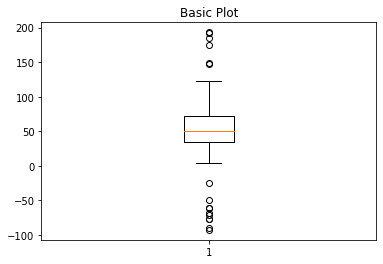

In [106]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data) #1D array는 그냥 한 x점에 일렬로 나열 
# 2D array라면 x, y형태로 좌표 작성

## 중간값에 파인 형태(notch) 만들기

Text(1.2, 55, 'This is notch\n(medians)')

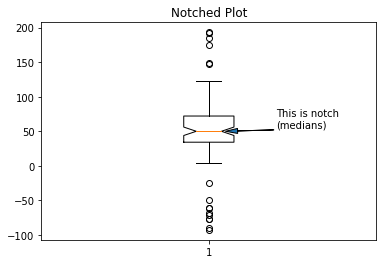

In [102]:
fig1, ax1 = plt.subplots()
ax1.set_title('Notched Plot')
notched_box = ax1.boxplot(data, notch=True)

# Notch is certicified interval at median.

arrow_notch_props = dict(headwidth=5, width=0.01)
ax1.annotate('This is notch\n(medians)', 
             (1.05 ,50), (1.2, 55), 
             arrowprops=arrow_notch_props)

## Flier에 속성 달기

{'whiskers': [<matplotlib.lines.Line2D at 0x1956486a100>,
 'caps': [<matplotlib.lines.Line2D at 0x1956486a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19567b28e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1956486ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1956486aee0>],
 'means': []}

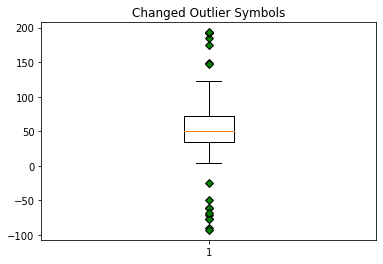

In [109]:
# flierprops에 들어갈 dictionary 만들기
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')

#flier prop으로 속성 작성해주기
ax3.boxplot(data, flierprops=green_diamond)

## Filer 안보이게 하기

{'whiskers': [<matplotlib.lines.Line2D at 0x19567cf13a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19567cf1940>,
 'boxes': [<matplotlib.lines.Line2D at 0x19567cf10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19567cf1ee0>],
 'fliers': [],
 'means': []}

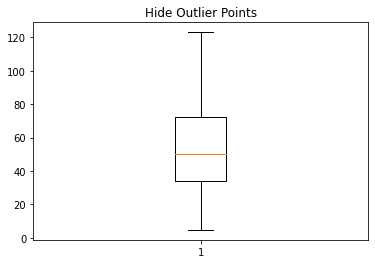

In [110]:
fig4, ax4 = plt.subplots()
ax4.set_title('Hide Outlier Points')

# showflier argument로 보이게, 안보이게 설정하기
ax4.boxplot(data, showfliers=False)

## boxplot 옆으로 기울이기

{'whiskers': [<matplotlib.lines.Line2D at 0x19567e16970>,
 'caps': [<matplotlib.lines.Line2D at 0x19567e16f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19567e166a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19567e234f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19567e237c0>],
 'means': []}

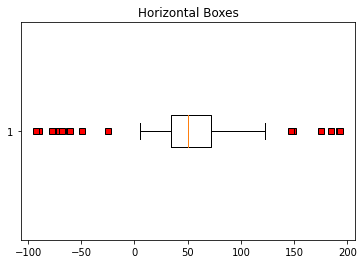

In [111]:
red_square = dict(markerfacecolor='r', marker='s')

fig, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(data, vert=False, flierprops=red_square)

## Whisker 줄이기

{'whiskers': [<matplotlib.lines.Line2D at 0x19567f2ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19567d495b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19567f2fd00>],
 'medians': [<matplotlib.lines.Line2D at 0x19567d49b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19567d49e20>],
 'means': []}

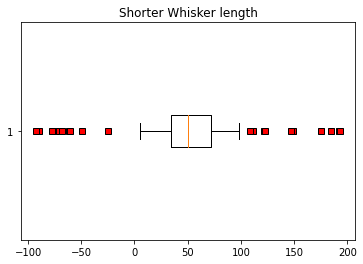

In [112]:
fig6 ,ax6 = plt.subplots()
ax6.set_title('Shorter Whisker length')

# 양옆 Whisker? 
ax6.boxplot(data, flierprops=red_square, vert=False, whis=0.8)

"med_line = bplot['medians'][0]\nbox = bplot['boxes'][0] #리스트로 나오니까... \nbox.set_facecolor('red') #patch는 'boxes에' 들어있다.\nmed_line.remove()"

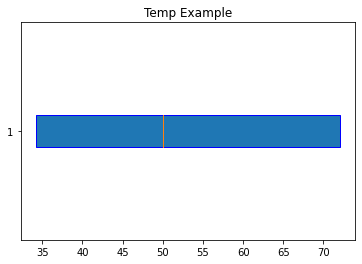

In [156]:
fig_temp, ax_temp = plt.subplots()
ax_temp.set_title('Temp Example')
bplot = ax_temp.boxplot(data, vert=False, patch_artist=True, showfliers=False, showmeans=False, showcaps=False, whis=0, boxprops={'color':'blue'})

'''med_line = bplot['medians'][0]
box = bplot['boxes'][0] #리스트로 나오니까... 
box.set_facecolor('red') #patch는 'boxes에' 들어있다.
med_line.remove()'''

In [157]:
box_temp = bplot['boxes'][0]

In [159]:
box_temp

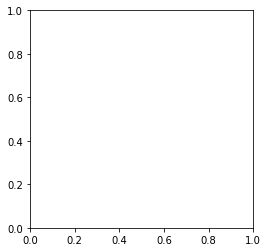

In [171]:
fig_circle, ax_circle = plt.subplots(figsize=(4,4))

circle = mpl.patches.Circle((0.2,0.2), radius=0.1)
circle2 = mpl.patches.Circle((0.4,0.4), radius=0.1)

ax_circle.add_patch(circle)
ax_circle.add_artist(circle2)


ax_circle.cla()
plt.show()